<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-08-25 13:53:59--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M   136MB/s    in 1.1s    

2025-08-25 13:54:01 (136 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



<Figure size 1200x800 with 0 Axes>

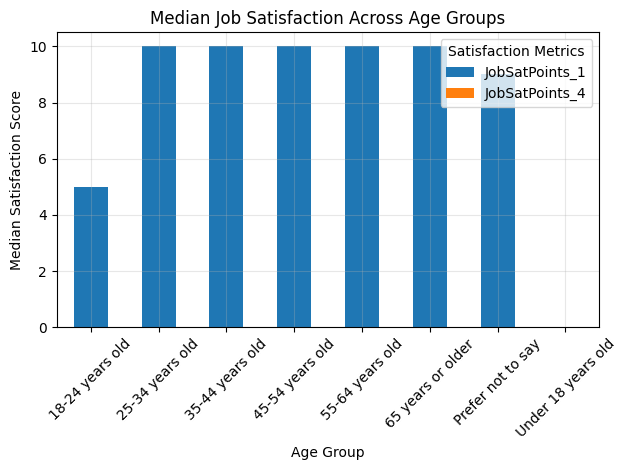

In [15]:
job_sat_cols = [col for col in df.columns if 'jobsat' in col.lower() and 'point' in col.lower()]
if len(job_sat_cols) >= 2 and 'Age' in df.columns:
    # Use the first two job satisfaction columns
    sat_col1, sat_col2 = job_sat_cols[0], job_sat_cols[1]

    # Group by age and calculate median satisfaction
    age_satisfaction = df.groupby('Age')[[sat_col1, sat_col2]].median().dropna()

    # Create stacked bar chart
    plt.figure(figsize=(12, 8))
    age_satisfaction.plot(kind='bar', stacked=True)
    plt.title('Median Job Satisfaction Across Age Groups')
    plt.xlabel('Age Group')
    plt.ylabel('Median Satisfaction Score')
    plt.legend(title='Satisfaction Metrics')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

else:
    print("Required columns not found. Available job satisfaction columns:", job_sat_cols)

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


/tmp/ipython-input-622062449.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

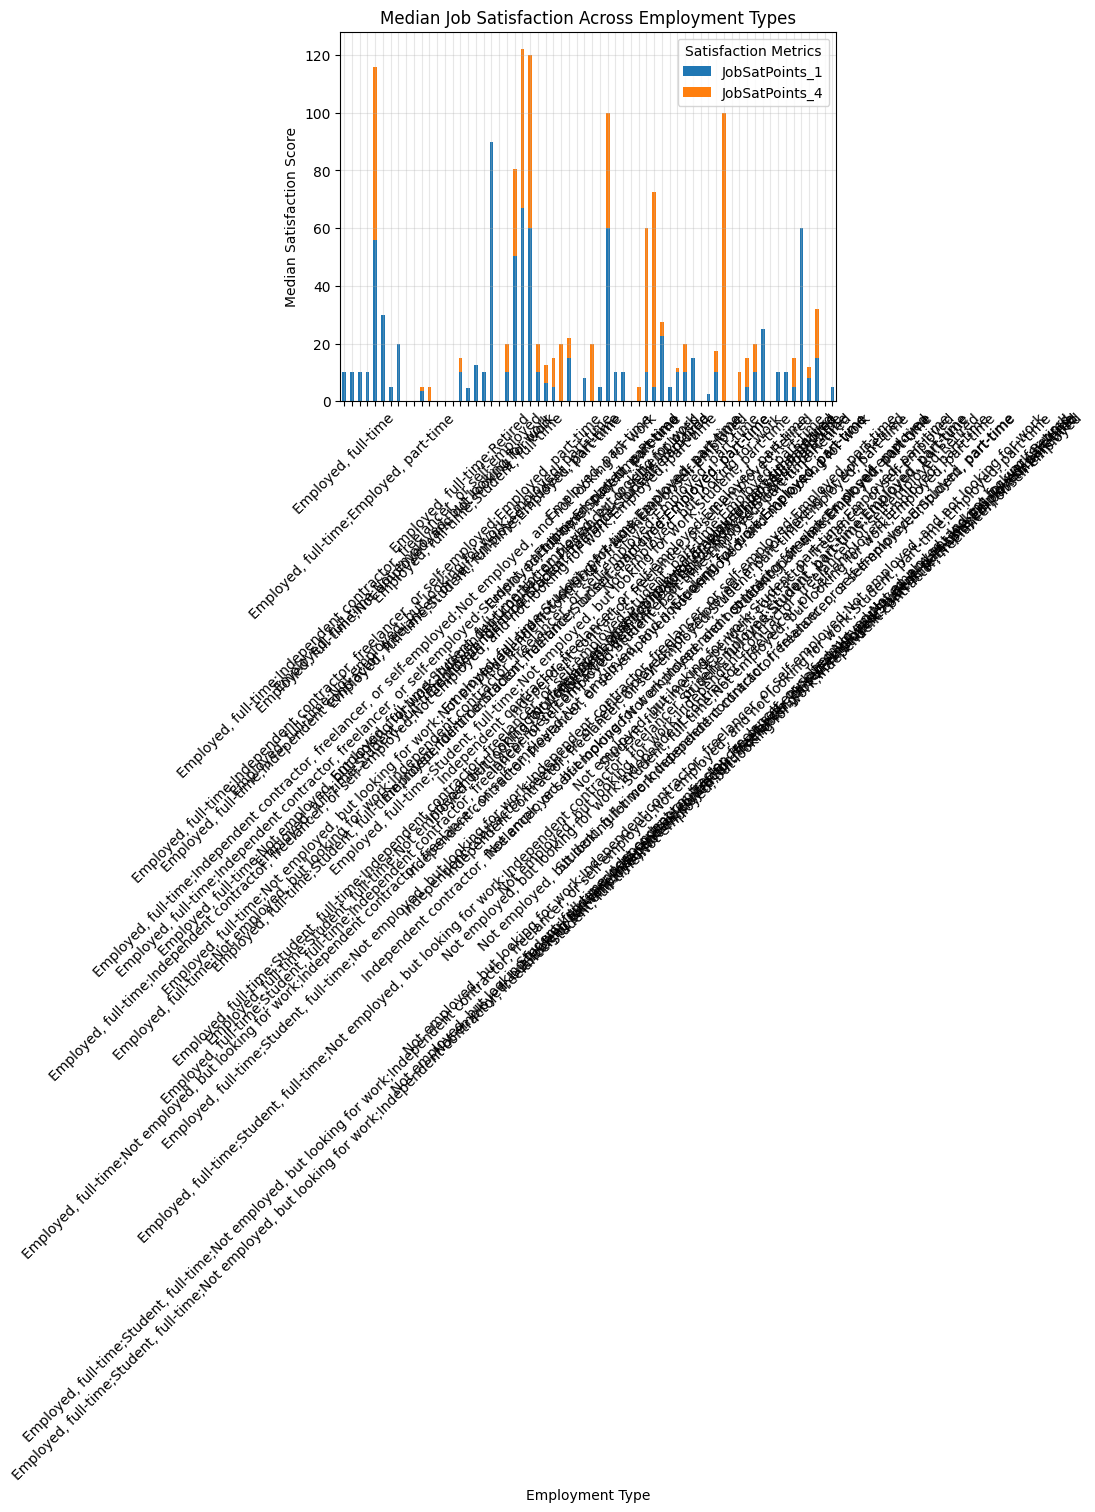

In [16]:
if len(job_sat_cols) >= 2 and 'Employment' in df.columns:
    # Use the first two job satisfaction columns
    sat_col1, sat_col2 = job_sat_cols[0], job_sat_cols[1]

    # Group by employment status and calculate median satisfaction
    employment_satisfaction = df.groupby('Employment')[[sat_col1, sat_col2]].median().dropna()

    # Create stacked bar chart
    plt.figure(figsize=(12, 8))
    employment_satisfaction.plot(kind='bar', stacked=True)
    plt.title('Median Job Satisfaction Across Employment Types')
    plt.xlabel('Employment Type')
    plt.ylabel('Median Satisfaction Score')
    plt.legend(title='Satisfaction Metrics')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

else:
    print("Required columns not found")

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


/tmp/ipython-input-2574664680.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  compensation_satisfaction = age_df.groupby(compensation_bins)[job_sat_cols[0]].mean().dropna()


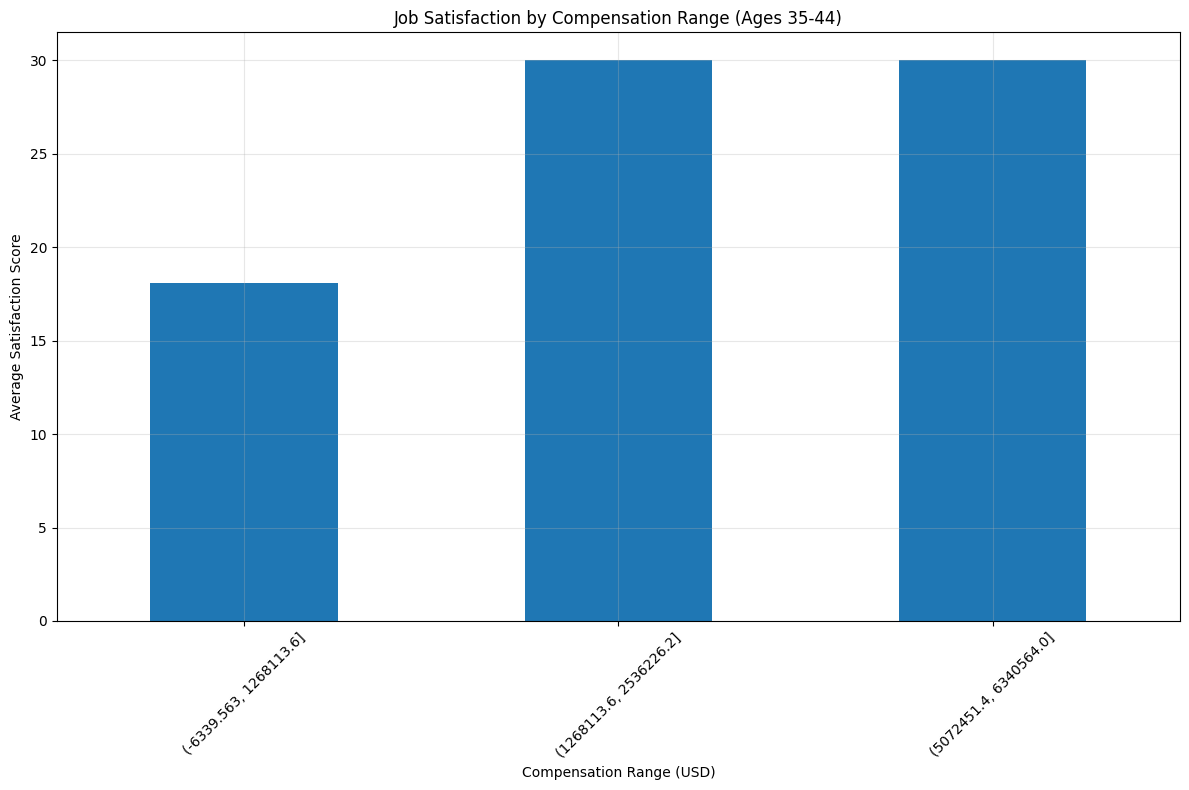

In [18]:
if 'ConvertedCompYearly' in df.columns and len(job_sat_cols) >= 1 and 'Age' in df.columns:
    # Filter for age 30-35 (adjust based on your age format)
    # age_filter = df['Age'].isin(['30-34 years old', '35-39 years old'])  # Adjust based on actual age values
    # Check the unique values in the 'Age' column to find the correct age ranges
    # print(df['Age'].unique()) # Uncomment this line to see the unique age values

    # Assuming '35-44 years old' is the relevant age group that includes 35
    age_filter = df['Age'] == '35-44 years old'
    age_df = df[age_filter].copy() # Use .copy() to avoid SettingWithCopyWarning

    # Drop rows with NaN in 'ConvertedCompYearly' before creating bins
    age_df.dropna(subset=['ConvertedCompYearly'], inplace=True)


    if not age_df.empty:
        # Create bins for compensation and calculate average job satisfaction
        compensation_bins = pd.cut(age_df['ConvertedCompYearly'], bins=5)
        compensation_satisfaction = age_df.groupby(compensation_bins)[job_sat_cols[0]].mean().dropna()

        # Create stacked chart (though for single metric, it's a regular bar chart)
        plt.figure(figsize=(12, 8))
        compensation_satisfaction.plot(kind='bar')
        plt.title('Job Satisfaction by Compensation Range (Ages 35-44)')
        plt.xlabel('Compensation Range (USD)')
        plt.ylabel('Average Satisfaction Score')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print("No data found for the selected age group after handling missing values.")

else:
    print("Required columns not found")

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


<Figure size 1200x800 with 0 Axes>

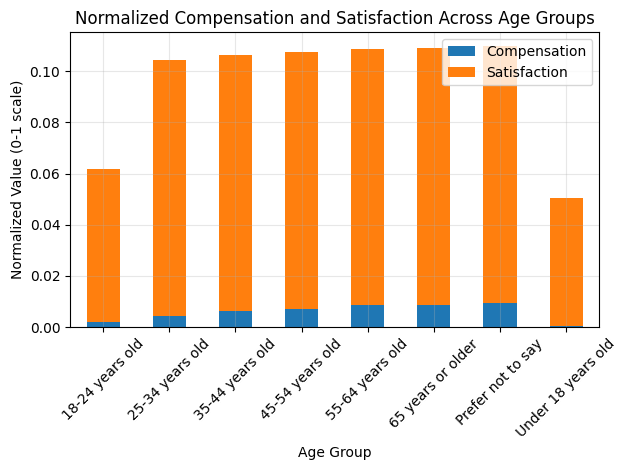

In [19]:
if 'ConvertedCompYearly' in df.columns and len(job_sat_cols) >= 1 and 'Age' in df.columns:
    # Normalize compensation and satisfaction to comparable scales
    df_clean = df.dropna(subset=['ConvertedCompYearly', job_sat_cols[0], 'Age'])
    df_clean = df_clean[df_clean['ConvertedCompYearly'] > 0]

    # Normalize both metrics to 0-1 scale for comparison
    df_clean['comp_normalized'] = (df_clean['ConvertedCompYearly'] - df_clean['ConvertedCompYearly'].min()) / (df_clean['ConvertedCompYearly'].max() - df_clean['ConvertedCompYearly'].min())
    df_clean['sat_normalized'] = (df_clean[job_sat_cols[0]] - df_clean[job_sat_cols[0]].min()) / (df_clean[job_sat_cols[0]].max() - df_clean[job_sat_cols[0]].min())

    # Group by age and calculate median normalized values
    age_comparison = df_clean.groupby('Age')[['comp_normalized', 'sat_normalized']].median().dropna()

    # Create stacked bar chart
    plt.figure(figsize=(12, 8))
    age_comparison.plot(kind='bar', stacked=True)
    plt.title('Normalized Compensation and Satisfaction Across Age Groups')
    plt.xlabel('Age Group')
    plt.ylabel('Normalized Value (0-1 scale)')
    plt.legend(['Compensation', 'Satisfaction'])
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

else:
    print("Required columns not found")

### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


<Figure size 1400x800 with 0 Axes>

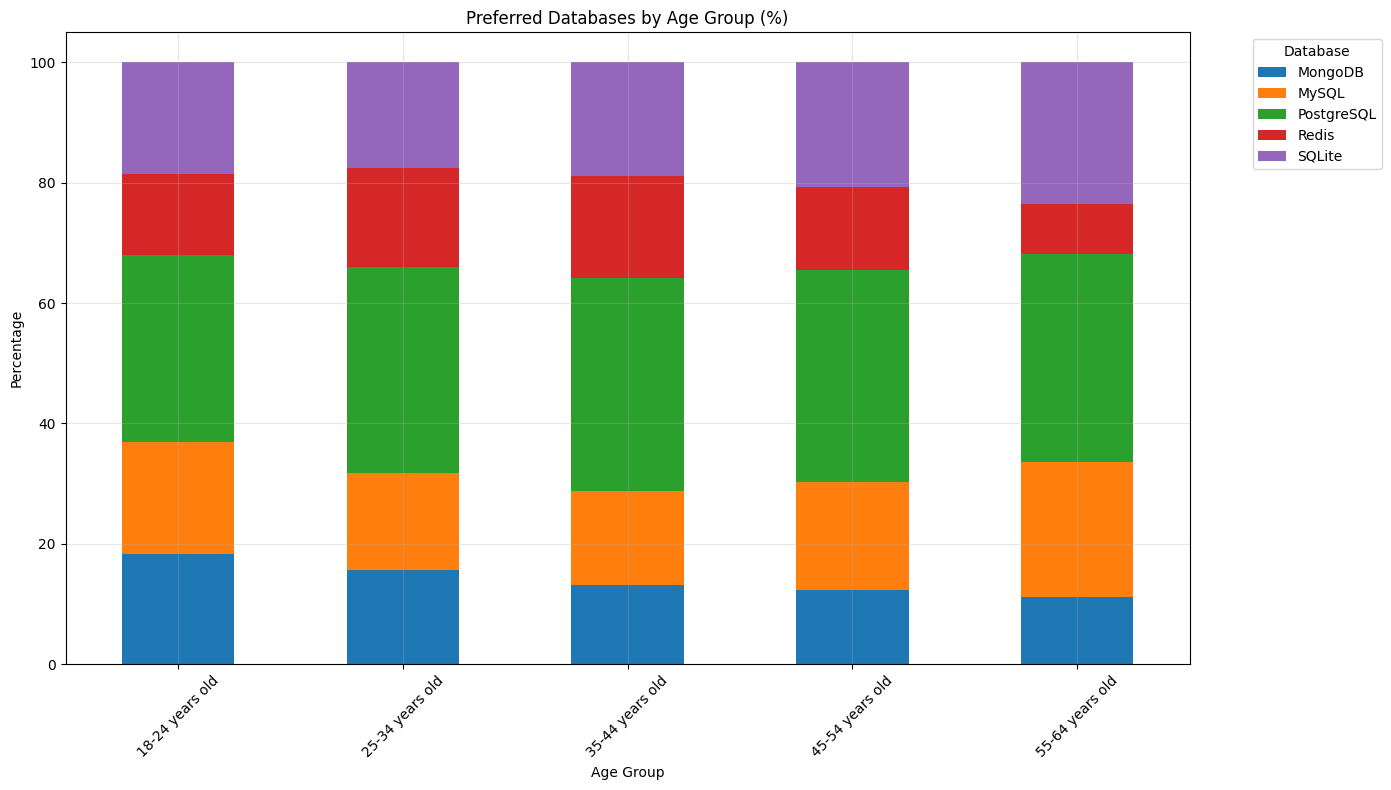

In [21]:
if 'DatabaseWantToWorkWith' in df.columns and 'Age' in df.columns:
    # Extract databases and age information
    db_age_data = []

    for idx, row in df.dropna(subset=['DatabaseWantToWorkWith', 'Age']).iterrows():
        if row['DatabaseWantToWorkWith']:
            databases = row['DatabaseWantToWorkWith'].split(';')
            for db in databases:
                db_age_data.append({'Database': db, 'Age': row['Age']})

    db_age_df = pd.DataFrame(db_age_data)

    # Get top 5 databases and top 5 age groups
    top_databases = db_age_df['Database'].value_counts().head(5).index
    top_ages = db_age_df['Age'].value_counts().head(5).index

    # Filter for top databases and ages
    filtered_data = db_age_df[db_age_df['Database'].isin(top_databases) & db_age_df['Age'].isin(top_ages)]

    # Create cross-tabulation
    db_age_crosstab = pd.crosstab(filtered_data['Age'], filtered_data['Database'])

    # Convert to percentages for stacked chart
    db_age_percentage = db_age_crosstab.div(db_age_crosstab.sum(axis=1), axis=0) * 100

    # Create stacked bar chart
    plt.figure(figsize=(14, 8))
    db_age_percentage.plot(kind='bar', stacked=True, figsize=(14, 8))
    plt.title('Preferred Databases by Age Group (%)')
    plt.xlabel('Age Group')
    plt.ylabel('Percentage')
    plt.legend(title='Database', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

else:
    print("Required columns not found")

##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


/tmp/ipython-input-29246102.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Satisfaction_Category'] = pd.cut(df_clean[job_sat_cols[0]], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
/tmp/ipython-input-29246102.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1400x800 with 0 Axes>

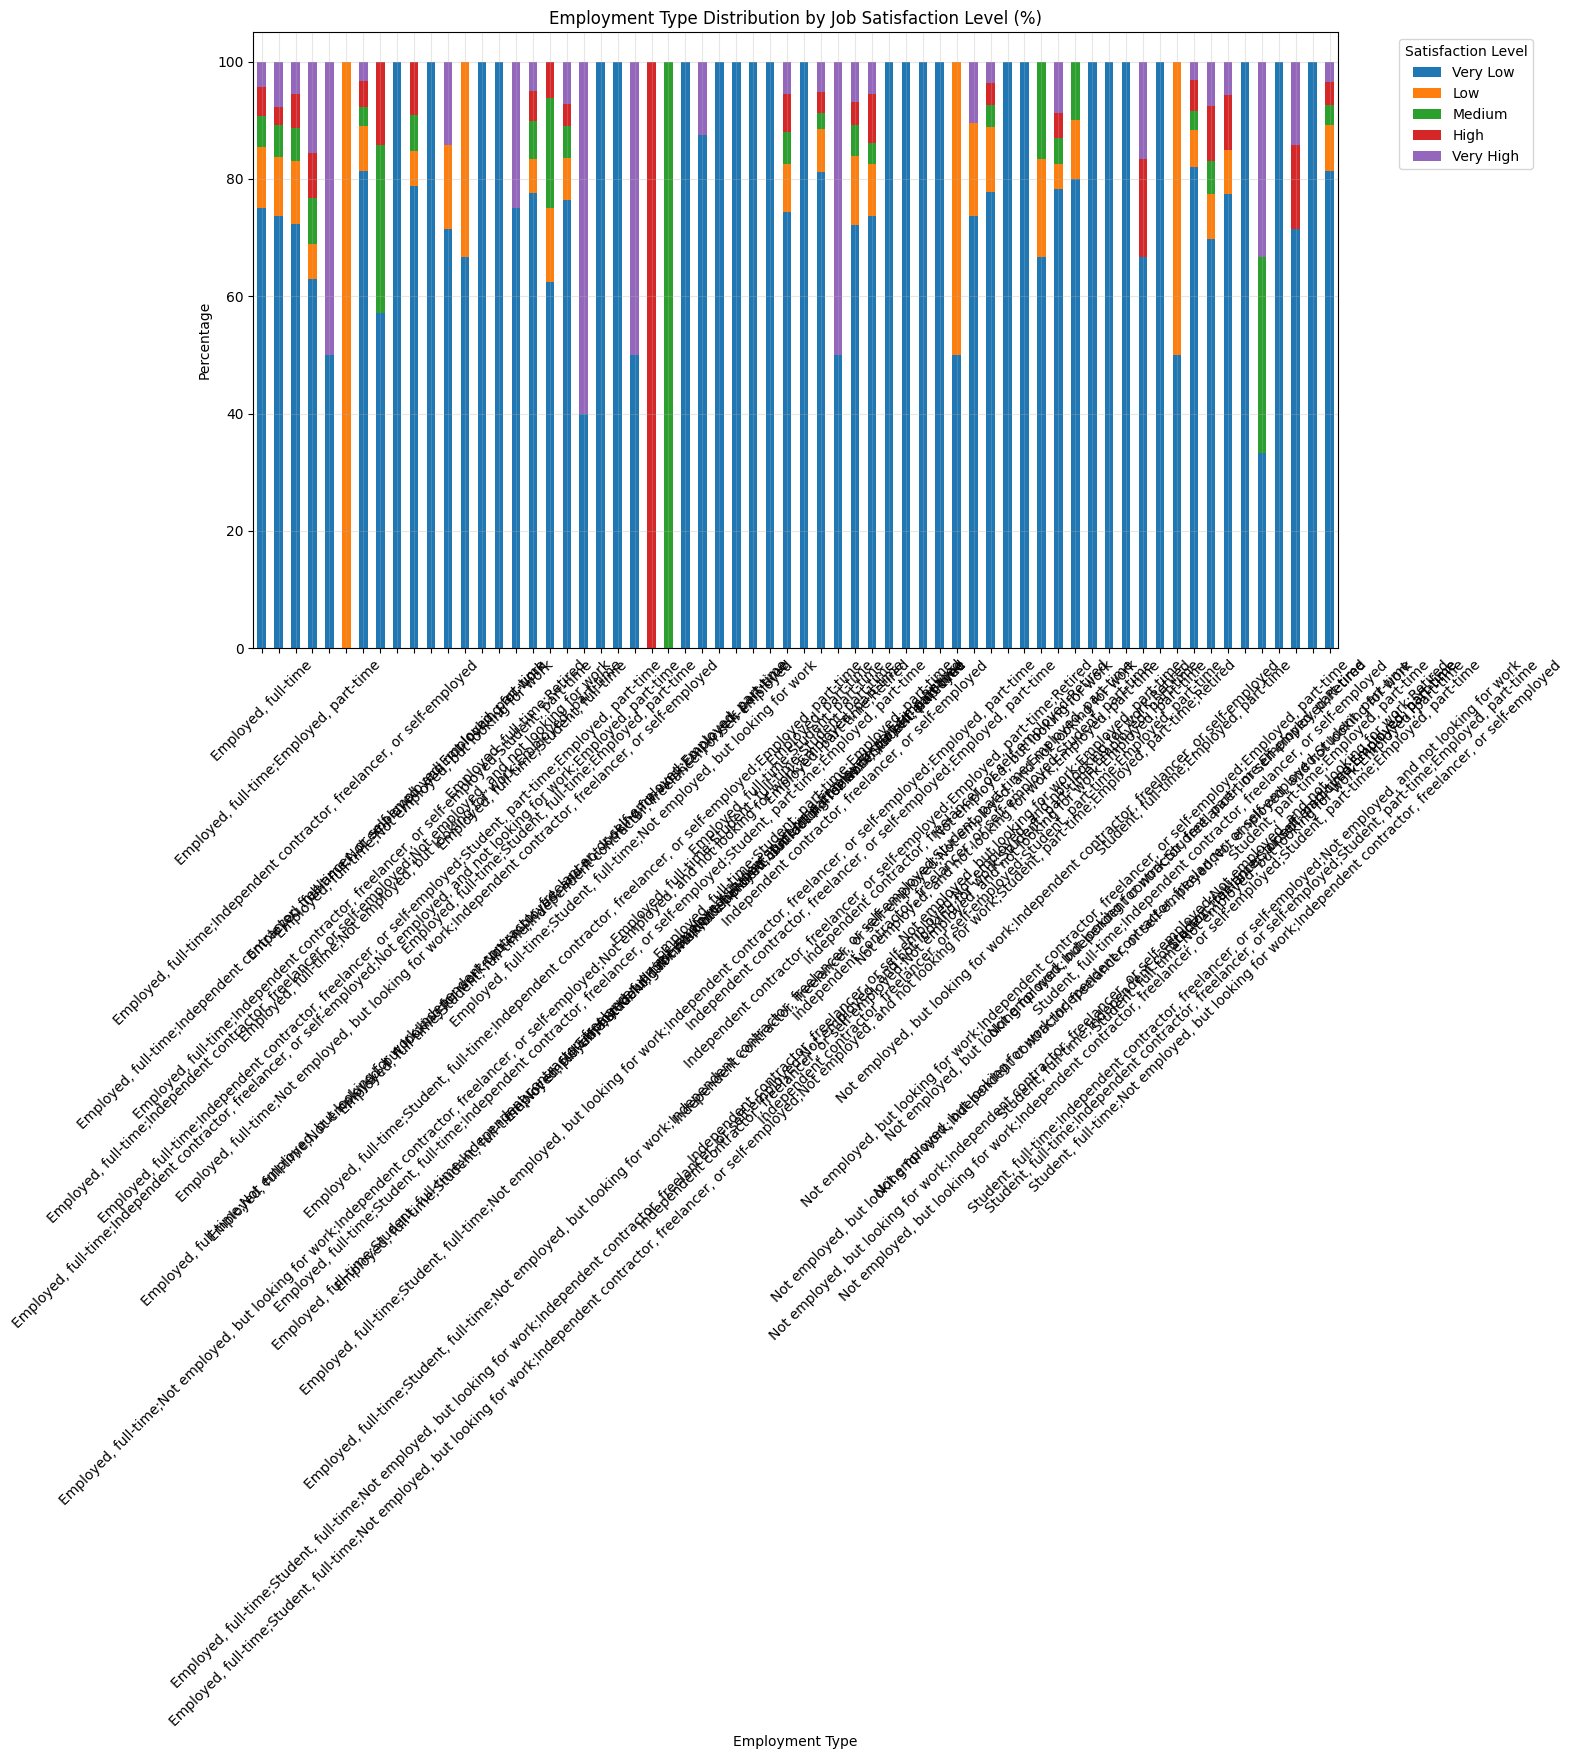

In [22]:
if 'Employment' in df.columns and len(job_sat_cols) >= 1:
    # Create satisfaction categories from the numeric score
    df_clean = df.dropna(subset=['Employment', job_sat_cols[0]])
    df_clean['Satisfaction_Category'] = pd.cut(df_clean[job_sat_cols[0]], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

    # Create cross-tabulation
    employment_sat_crosstab = pd.crosstab(df_clean['Satisfaction_Category'], df_clean['Employment'])

    # Convert to percentages for stacked chart
    employment_sat_percentage = employment_sat_crosstab.div(employment_sat_crosstab.sum(axis=0), axis=1) * 100

    # Create stacked bar chart
    plt.figure(figsize=(14, 8))
    employment_sat_percentage.T.plot(kind='bar', stacked=True, figsize=(14, 8))
    plt.title('Employment Type Distribution by Job Satisfaction Level (%)')
    plt.xlabel('Employment Type')
    plt.ylabel('Percentage')
    plt.legend(title='Satisfaction Level', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

else:
    print("Required columns not found")

### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


<Figure size 1400x800 with 0 Axes>

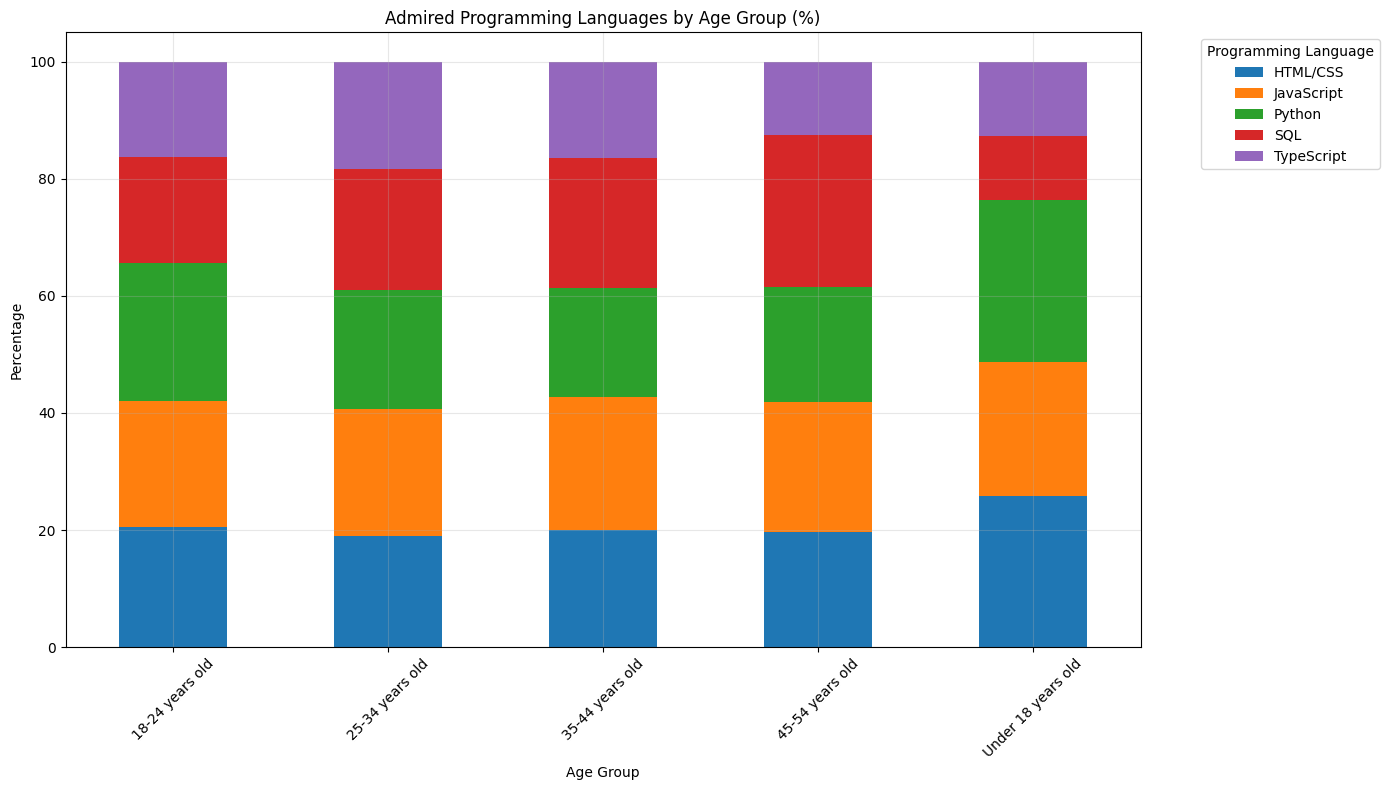

In [24]:
if 'LanguageAdmired' in df.columns and 'Age' in df.columns:
    # Extract languages and age information
    lang_age_data = []

    for idx, row in df.dropna(subset=['LanguageAdmired', 'Age']).iterrows():
        if row['LanguageAdmired']:
            languages = row['LanguageAdmired'].split(';')
            for lang in languages:
                lang_age_data.append({'Language': lang, 'Age': row['Age']})

    lang_age_df = pd.DataFrame(lang_age_data)

    # Get top 5 languages and top 5 age groups
    top_languages = lang_age_df['Language'].value_counts().head(5).index
    top_ages = lang_age_df['Age'].value_counts().head(5).index

    # Filter for top languages and ages
    filtered_data = lang_age_df[lang_age_df['Language'].isin(top_languages) & lang_age_df['Age'].isin(top_ages)]

    # Create cross-tabulation
    lang_age_crosstab = pd.crosstab(filtered_data['Age'], filtered_data['Language'])

    # Convert to percentages for stacked chart
    lang_age_percentage = lang_age_crosstab.div(lang_age_crosstab.sum(axis=1), axis=0) * 100

    # Create stacked bar chart
    plt.figure(figsize=(14, 8))
    lang_age_percentage.plot(kind='bar', stacked=True, figsize=(14, 8))
    plt.title('Admired Programming Languages by Age Group (%)')
    plt.xlabel('Age Group')
    plt.ylabel('Percentage')
    plt.legend(title='Programming Language', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

else:
    print("Required columns not found")

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


/tmp/ipython-input-2382981966.py:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1400x800 with 0 Axes>

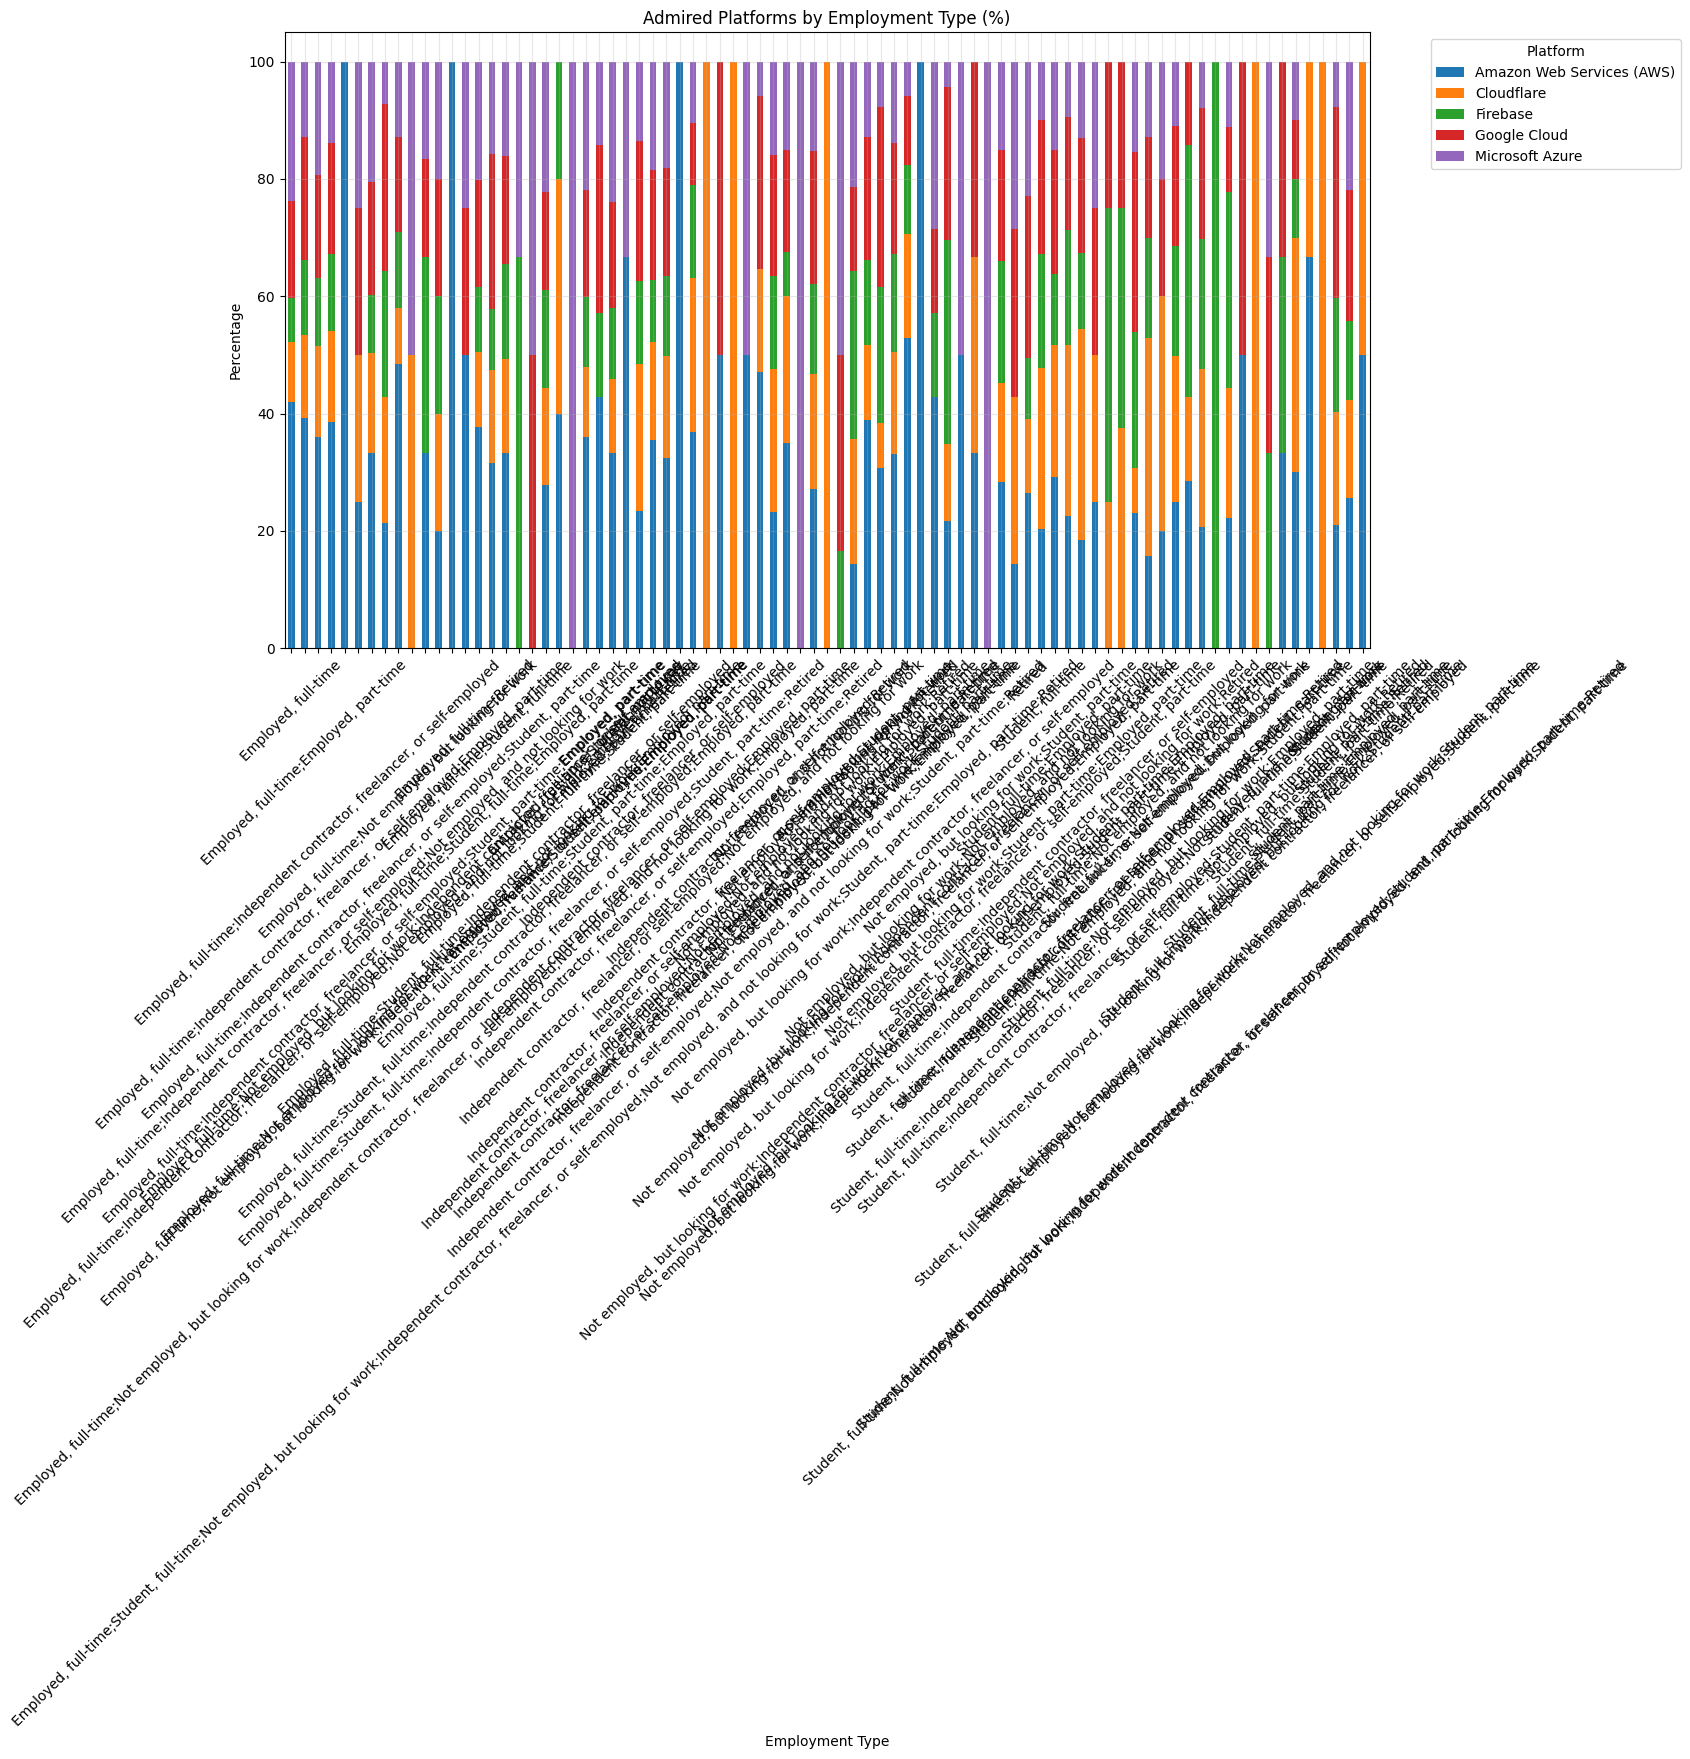

In [25]:
# Check for platform admired column
platform_columns = [col for col in df.columns if 'platform' in col.lower() and 'admired' in col.lower()]
if platform_columns and 'Employment' in df.columns:
    platform_col = platform_columns[0]

    # Extract platforms and employment information
    platform_employment_data = []

    for idx, row in df.dropna(subset=[platform_col, 'Employment']).iterrows():
        if row[platform_col]:
            platforms = row[platform_col].split(';')
            for platform in platforms:
                platform_employment_data.append({'Platform': platform, 'Employment': row['Employment']})

    platform_employment_df = pd.DataFrame(platform_employment_data)

    # Get top 5 platforms
    top_platforms = platform_employment_df['Platform'].value_counts().head(5).index

    # Filter for top platforms
    filtered_data = platform_employment_df[platform_employment_df['Platform'].isin(top_platforms)]

    # Create cross-tabulation
    platform_employment_crosstab = pd.crosstab(filtered_data['Employment'], filtered_data['Platform'])

    # Convert to percentages for stacked chart
    platform_employment_percentage = platform_employment_crosstab.div(platform_employment_crosstab.sum(axis=1), axis=0) * 100

    # Create stacked bar chart
    plt.figure(figsize=(14, 8))
    platform_employment_percentage.plot(kind='bar', stacked=True, figsize=(14, 8))
    plt.title('Admired Platforms by Employment Type (%)')
    plt.xlabel('Employment Type')
    plt.ylabel('Percentage')
    plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

else:
    print("Required columns not found. Available platform columns:", [col for col in df.columns if 'platform' in col.lower()])

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
